# Signal-to-noise Paradox
### Calculation of the Ratio of Predictable Components (RPC)

[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/ai_weather_to_climate_ats780A8/tree/main/lecture_code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/ai_weather_to_climate_ats780A8/blob/main/lecture_code/signal_to_noise_rpc.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_rednoise(N, tau, var=1):
    """
    Create a red noise time series of length N with a given decorrelation time tau.
    """
    # create red-noise time series iteratively
    a = np.exp(-1.0 / tau)
    b = np.sqrt(1.0 - a**2)
    x = []
    x.append(
        np.random.normal(
            0.0,
            1.0,
            size=1,
        )
    )
    for it in np.arange(0, N - 1, 1):
        x.append(a * x[it] + b * np.random.normal(size=1))
    x = np.asarray(x)[:, 0]
    return x * np.sqrt(var / np.var(x))


def create_ensemble(N, tau, nens=1000, var=1):
    """
    Create an ensemble of red noise time series.
    """
    ensemble = []
    for i in range(nens):
        ensemble.append(create_rednoise(N, tau, var))
    return np.asarray(ensemble)

data_ens.shape=(250, 10000)
RPC =  1.8120051753745683


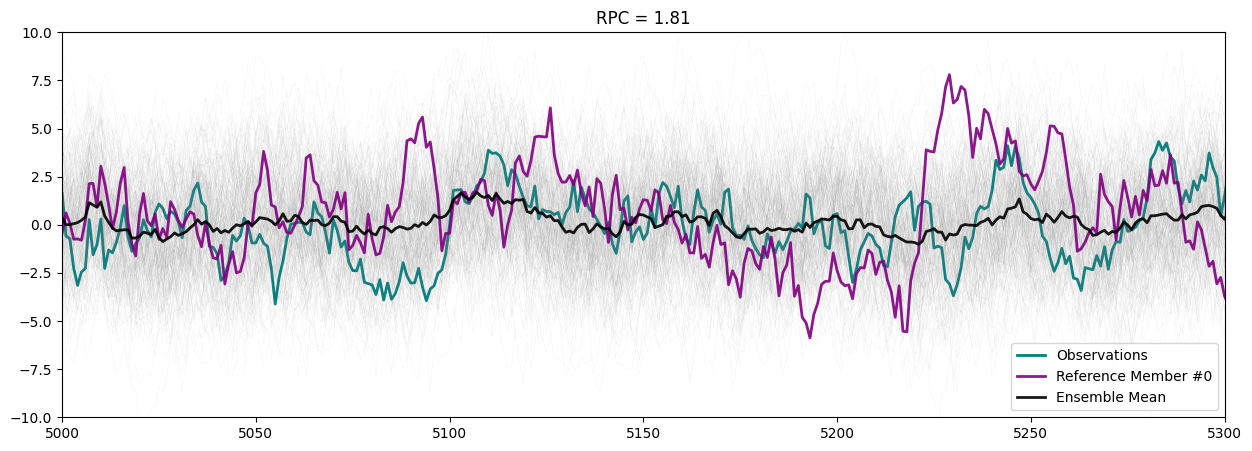

In [3]:
# Change these parameters to see how the Ratio of Predictable Components (RPC)
# changes with different signal and noise variances.
# ------
var_signal_obs, var_signal_ens = 1, 0.25
var_noise_obs, var_noise_ens = 3, 6
# ------

Nsamples = 10000
Nens = 250
tau = 10

signal_obs = create_rednoise(Nsamples, tau, var=var_signal_obs)
noise_obs = create_rednoise(Nsamples, tau, var=var_noise_obs)
data_obs = signal_obs + noise_obs

data_ens = (
    create_ensemble(Nsamples, tau, nens=Nens, var=var_noise_ens)
    + np.sqrt(var_signal_ens) * signal_obs
)
print(f"{data_ens.shape=}")

# use first ensemble member as the reference
rmo = np.corrcoef(data_ens.mean(axis=0), data_obs)[0, 1]
rmm = np.corrcoef(data_ens[1:, :].mean(axis=0), data_ens[0, :])[0, 1]
RPC = np.sqrt(rmo**2 / rmm**2)

print("RPC = ", RPC)

# Plot the observations, ensemble members, and ensemble mean
plt.figure(figsize=(15, 5))
plt.plot(data_obs, label="Observations", linewidth=2, color="teal")
plt.plot(data_ens.T, color="gray", alpha=0.25, linewidth=0.1)
plt.plot(
    data_ens[0, :], label="Reference Member #0", color="purple", alpha=0.9, linewidth=2
)
plt.plot(
    data_ens.mean(axis=0), label="Ensemble Mean", color="k", alpha=0.9, linewidth=2
)
plt.title(f"RPC = {RPC:.2f}")

plt.xlim(5000, 5300)
plt.ylim(-10, 10)
plt.legend()
plt.show()